# Feature Engineering with Open-Source

In [1]:
# data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for saving the pipeline
import joblib

# from Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Binarizer

# from feature-engine
from feature_engine.imputation import (
    AddMissingIndicator,
    MeanMedianImputer,
    CategoricalImputer
)
from feature_engine.encoding import (
    RareLabelEncoder,
    OrdinalEncoder
)
from feature_engine.transformation import (
    LogTransformer,
    YeoJohnsonTransformer
)
from feature_engine.selection import DropFeatures
from feature_engine.wrappers import SklearnTransformerWrapper

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
data = pd.read_csv(r'C:\Users\kinwa\Downloads\train.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
## Separate dataset into train and test

In [4]:
# let's seperate the dataset into train and test split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), # predictive variables
    data['SalePrice'], # target variable
    test_size=0.1,
    random_state=0
)

X_train.shape, y_train.shape

((1314, 79), (1314,))

In [5]:
## Feature Engineering

In [6]:
## Target
#### for targte we just transform both train and test sets using log transformation.

In [7]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [8]:
## Missing Values
#### We will replace missing values with the string "missing" in those variables with a lot of missing data.

#### Alternatively, 
#### we will replace missing data with the most frequent category 
#### in those variables that contain fewer observations without values.

In [9]:
# let's identify the categorical variables
# let's capture those of type object

cat_vars = [var for var in data.columns if data[var].dtype=='O']

# MSSubClass is also categorical by definition, despite its numeric values
# therefore let's add MSSubuclass to the categorical variables

cat_vars = cat_vars + ['MSSubClass']

# cast all variables as categorical
X_train[cat_vars] = X_train[cat_vars].astype('O')
X_test[cat_vars] = X_test[cat_vars].astype('O')

# number of categorical variables
len(cat_vars)

44

In [10]:
# make a list of categorical variables that contain missing values
cat_vars_with_na = [var for var in cat_vars if X_train[var].isnull().sum() > 0]

# print percentage of missing values per variable
X_train[cat_vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995434
MiscFeature     0.961187
Alley           0.938356
Fence           0.814307
MasVnrType      0.601218
FireplaceQu     0.472603
GarageType      0.056317
GarageFinish    0.056317
GarageQual      0.056317
GarageCond      0.056317
BsmtExposure    0.025114
BsmtFinType2    0.025114
BsmtQual        0.024353
BsmtCond        0.024353
BsmtFinType1    0.024353
Electrical      0.000761
dtype: float64

In [11]:
# variables to impute with the string missing
with_string_missing = [var for var in cat_vars_with_na if X_train[var].isnull().mean() > 0.1]

# variables to impute with the most frequent category
with_frequent_category = [var for var in cat_vars_with_na if X_train[var].isnull().mean() < 0.1]

In [12]:
with_string_missing

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [13]:
with_frequent_category

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [14]:
# replace missing values with new label: "Missing"

# set up the class
cat_imputer_missing = CategoricalImputer(imputation_method='missing', variables=with_string_missing)

# fitting the class to train set
cat_imputer_missing.fit(X_train)

# the class learns and stores the parameters
cat_imputer_missing.imputer_dict_

{'Alley': 'Missing',
 'MasVnrType': 'Missing',
 'FireplaceQu': 'Missing',
 'PoolQC': 'Missing',
 'Fence': 'Missing',
 'MiscFeature': 'Missing'}

In [15]:
# replace NA by missing

# IMPORTANT: note that we could store this class with joblib
X_train = cat_imputer_missing.transform(X_train)
X_test = cat_imputer_missing.transform(X_test)

C:\Users\kinwa\miniconda3\Lib\site-packages\feature_engine\imputation\categorical.py:232: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[variable]):
C:\Users\kinwa\miniconda3\Lib\site-packages\feature_engine\imputation\categorical.py:232: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[variable]):


In [16]:
# replace missing values with most frequent category

# set up the class
cat_imputer_frequent = CategoricalImputer(imputation_method='frequent', variables=with_frequent_category)

# fitting the class to train set
cat_imputer_frequent.fit(X_train)

# the class learns and stores the parameters
cat_imputer_frequent.imputer_dict_

{'BsmtQual': 'TA',
 'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'Unf',
 'BsmtFinType2': 'Unf',
 'Electrical': 'SBrkr',
 'GarageType': 'Attchd',
 'GarageFinish': 'Unf',
 'GarageQual': 'TA',
 'GarageCond': 'TA'}

In [17]:
# replace NA by missing

# IMPORTANT: note that we could store this class with joblib
X_train = cat_imputer_frequent.transform(X_train)
X_test = cat_imputer_frequent.transform(X_test)

In [18]:
# check that we have no missing information in the engineered variables

X_train[cat_vars_with_na].isnull().sum().any()

False

In [19]:
# check that test set does not contain null values in the engineered variables

[var for var in cat_vars_with_na if X_test[var].isnull().sum() > 0]

[]

In [20]:
## Numerical variables
#### To engineer missing values in numerical variables, let's:

#### add a binary missing indicator variable
#### and then replace the missing values in the original variable with the mean

In [21]:
# let's make a list of numerical variables

num_vars = [var for var in X_train.columns if var not in cat_vars and var != 'SalePrice']

# number of numerical varibles
len(num_vars)

35

In [22]:
# make a list with the numerical variables that contain missing values
vars_with_na = [var for var in num_vars if X_train[var].isnull().sum() > 0]

# print percentage of missing values per variable
X_train[vars_with_na].isnull().mean()

LotFrontage    0.177321
MasVnrArea     0.004566
GarageYrBlt    0.056317
dtype: float64

In [23]:
# print, makes my life easier when I want to create the config
vars_with_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [24]:
# add missing indicator
missing_ind = AddMissingIndicator(variables=vars_with_na)

missing_ind.fit(X_train)

X_train = missing_ind.transform(X_train)
X_test = missing_ind.transform(X_test)

# check the binary missing indicator variables
X_train[['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na']].head()

,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
930,0,0,0
656,0,0,0
45,0,0,0
1348,1,0,0
55,0,0,0


In [25]:
# then replace missing data with the mean

# set the imputer
mean_imputer = MeanMedianImputer(imputation_method='mean', variables=vars_with_na)

# learn and store parameters from train set
mean_imputer.fit(X_train)

# the stored parameters
mean_imputer.imputer_dict_

{'LotFrontage': 69.87974098057354,
 'MasVnrArea': 103.7974006116208,
 'GarageYrBlt': 1978.2959677419356}

In [26]:
X_train = mean_imputer.transform(X_train)
X_test = mean_imputer.transform(X_test)

# check for missing values in train set
print(X_train.isnull().sum().any())

# check for missing values in test set
print(X_test.isnull().sum().any())

False
False


In [27]:
## Temporal variables

In [28]:
def elapsed_year(df, var):
    # capture difference between the year variable
    # and the year in which the house was sold
    df[var] = df['YrSold'] - df[var]
    return df

In [29]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_year(X_train, var)
    X_test = elapsed_year(X_test, var)    

In [30]:
# now we drop YrSold
drop_features = DropFeatures(features_to_drop=['YrSold'])

X_train = drop_features.fit_transform(X_train)
X_test = drop_features.transform(X_test)

In [31]:
## Numerical variable transformation
### Logarithmic transformation
#### We will transform with the logarightm the positive numerical variables 
#### in order to get a more Gaussian-like distribution.

In [32]:
log_transformer = LogTransformer(
    variables=["LotFrontage", "1stFlrSF", "GrLivArea"])
X_train = log_transformer.fit_transform(X_train)
X_test = log_transformer.transform(X_test)

In [33]:
# check that test set does not contain null values in the engineered variables
[var for var in ["LotFrontage", "1stFlrSF", "GrLivArea"] if X_test[var].isnull().sum() > 0]

[]

In [34]:
# same for train set
[var for var in ["LotFrontage", "1stFlrSF", "GrLivArea"] if X_train[var].isnull().sum() > 0]

[]

In [35]:
## Yeo-Johnson transformation
#### We will apply the Yeo-Johnson transformation to LotArea.

In [36]:
yeo_transformer = YeoJohnsonTransformer(variables='LotArea')

X_train = yeo_transformer.fit_transform(X_train)
X_test = yeo_transformer.transform(X_test)

# the learned parameter
yeo_transformer.lambda_dict_

{'LotArea': 0.017755558882009546}

In [37]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [38]:
# check absence of na in the test set
[var for var in X_train.columns if X_test[var].isnull().sum() > 0]

[]

In [39]:
## Binarize skewed variables
#### There were a few variables very skewed, we would transform those into binary variables

In [40]:
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]
binarizer = SklearnTransformerWrapper(transformer=Binarizer(threshold=0), variables=skewed)
X_train = binarizer.fit_transform(X_train)
X_test = binarizer.transform(X_test)

X_test[skewed].head()

,BsmtFinSF2,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
529,0,0,1,0,0,0
491,1,0,1,0,0,0
459,0,0,1,0,0,0
279,0,0,0,0,0,0
655,0,0,0,0,0,0


In [41]:
## Categorical variables
### Apply mappings
#### These are variables which values have an assigned order, related to quality.

In [42]:
# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    X_train[var] = X_train[var].map(qual_mappings)
    X_test[var] = X_test[var].map(qual_mappings)

In [43]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'

X_train[var] = X_train[var].map(exposure_mappings)
X_test[var] = X_test[var].map(exposure_mappings)

In [44]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    X_train[var] = X_train[var].map(finish_mappings)
    X_test[var] = X_test[var].map(finish_mappings)

In [45]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

X_train[var] = X_train[var].map(garage_mappings)
X_test[var] = X_test[var].map(garage_mappings)

In [46]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

X_train[var] = X_train[var].map(fence_mappings)
X_test[var] = X_test[var].map(fence_mappings)

In [47]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [48]:
## Removing Rare Labels
#### For the remaining categorical variables, 
#### let's group those categories that are present in less than 1% of the observations. 
#### That is, all values of categorical variables that are shared by less than 1% of houses, 
#### will be replaced by the string "Rare".

In [49]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

In [50]:
cat_others

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [52]:
rare_encoder = RareLabelEncoder(tol=0.01, n_categories=1, variables=cat_others)

# find common labels
rare_encoder.fit(X_train)

# the common labels are stored, we can save the class
# and then use it later :)
rare_encoder.encoder_dict_

{'MSZoning': ['RL', 'RM', 'FV', 'RH'],
 'Street': ['Pave'],
 'Alley': ['Missing', 'Grvl', 'Pave'],
 'LotShape': ['Reg', 'IR1', 'IR2'],
 'LandContour': ['Lvl', 'Bnk', 'HLS', 'Low'],
 'Utilities': ['AllPub'],
 'LotConfig': ['Inside', 'Corner', 'CulDSac', 'FR2'],
 'LandSlope': ['Gtl', 'Mod'],
 'Neighborhood': ['NAmes',
  'CollgCr',
  'OldTown',
  'Edwards',
  'Somerst',
  'NridgHt',
  'Gilbert',
  'Sawyer',
  'NWAmes',
  'BrkSide',
  'SawyerW',
  'Crawfor',
  'Mitchel',
  'Timber',
  'NoRidge',
  'IDOTRR',
  'ClearCr',
  'SWISU',
  'StoneBr',
  'Blmngtn',
  'MeadowV',
  'BrDale'],
 'Condition1': ['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN'],
 'Condition2': ['Norm'],
 'BldgType': ['1Fam', 'TwnhsE', 'Duplex', 'Twnhs', '2fmCon'],
 'HouseStyle': ['1Story', '2Story', '1.5Fin', 'SLvl', 'SFoyer'],
 'RoofStyle': ['Gable', 'Hip'],
 'RoofMatl': ['CompShg'],
 'Exterior1st': ['VinylSd',
  'HdBoard',
  'Wd Sdng',
  'MetalSd',
  'Plywood',
  'CemntBd',
  'BrkFace',
  'Stucco',
  'WdShing',
  'AsbShng'],


In [53]:
X_train = rare_encoder.transform(X_train)
X_test = rare_encoder.transform(X_test)

In [54]:
## Encoding of categorical variables
#### Next, let's to transform the strings of the categorical variables into numbers

In [55]:
# set up the encoder
cat_encoder = OrdinalEncoder(encoding_method='ordered', variables=cat_others)

# create the mappings
cat_encoder.fit(X_train, y_train)

# mappings are stored and class can be saved
cat_encoder.encoder_dict_

{'MSZoning': {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4},
 'Street': {'Rare': 0, 'Pave': 1},
 'Alley': {'Grvl': 0, 'Pave': 1, 'Missing': 2},
 'LotShape': {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3},
 'LandContour': {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3},
 'Utilities': {'Rare': 0, 'AllPub': 1},
 'LotConfig': {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4},
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Rare': 2},
 'Neighborhood': {'IDOTRR': 0,
  'MeadowV': 1,
  'BrDale': 2,
  'Edwards': 3,
  'BrkSide': 4,
  'OldTown': 5,
  'Sawyer': 6,
  'SWISU': 7,
  'NAmes': 8,
  'Mitchel': 9,
  'SawyerW': 10,
  'Rare': 11,
  'NWAmes': 12,
  'Gilbert': 13,
  'Blmngtn': 14,
  'CollgCr': 15,
  'Crawfor': 16,
  'ClearCr': 17,
  'Somerst': 18,
  'Timber': 19,
  'StoneBr': 20,
  'NridgHt': 21,
  'NoRidge': 22},
 'Condition1': {'Artery': 0,
  'Feedr': 1,
  'Norm': 2,
  'RRAn': 3,
  'Rare': 4,
  'PosN': 5},
 'Condition2': {'Rare': 0, 'Norm': 1},
 'BldgType': {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fa

In [56]:
X_train = cat_encoder.transform(X_train)
X_test = cat_encoder.transform(X_test)

C:\Users\kinwa\miniconda3\Lib\site-packages\feature_engine\encoding\base_encoder.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[feature]):
C:\Users\kinwa\miniconda3\Lib\site-packages\feature_engine\encoding\base_encoder.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[feature]):
C:\Users\kinwa\miniconda3\Lib\site-packages\feature_engine\encoding\base_encoder.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[feature]):
C:\Users\kinwa\miniconda3\Lib\site-packages\feature_engine\encoding\base_encoder.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed i

In [57]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [58]:
# check absence of na in the test set
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

[]

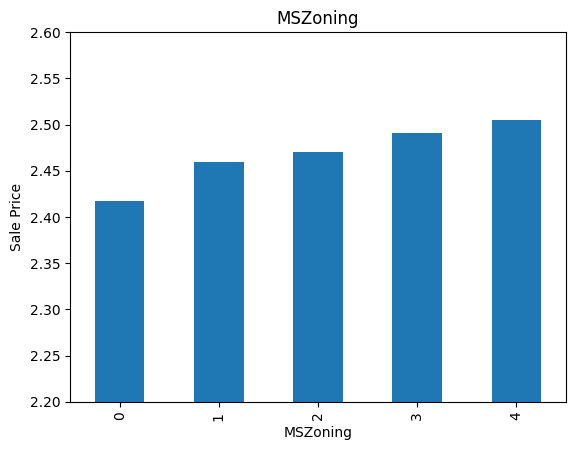

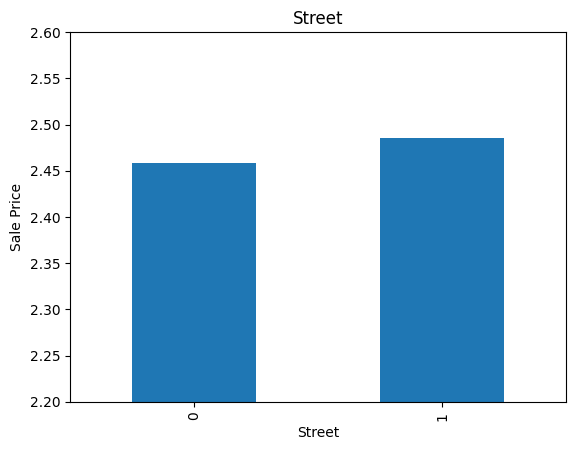

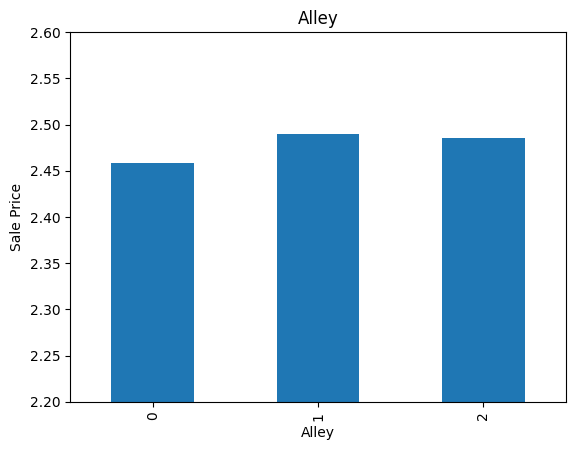

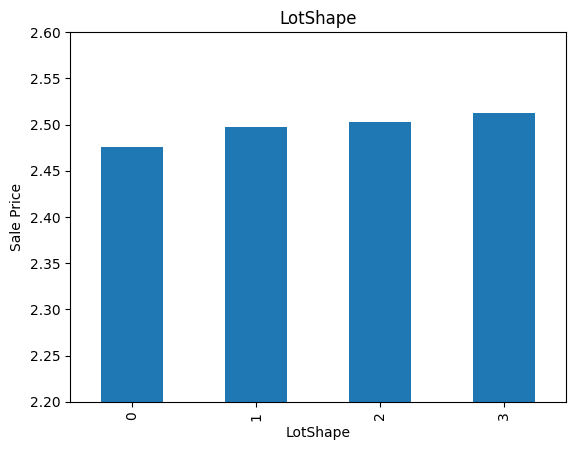

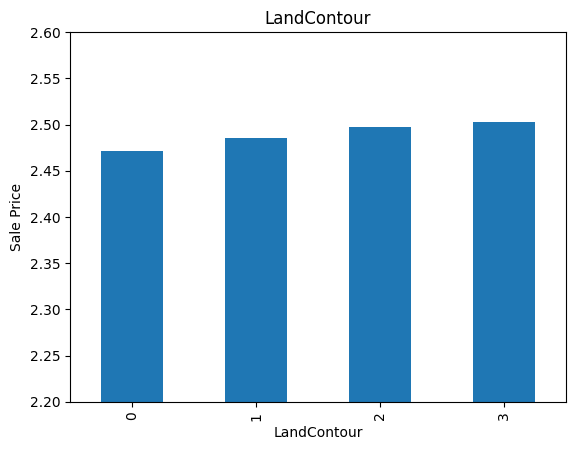

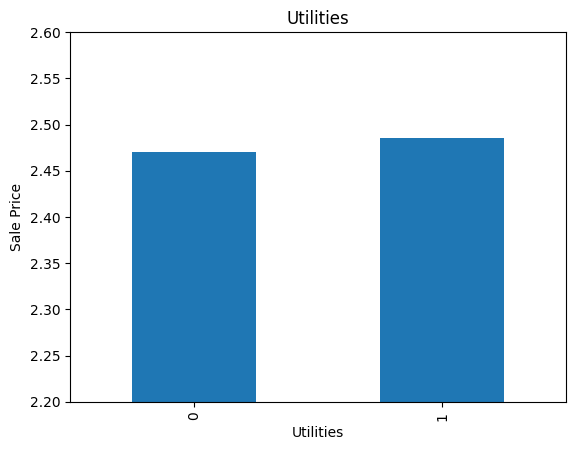

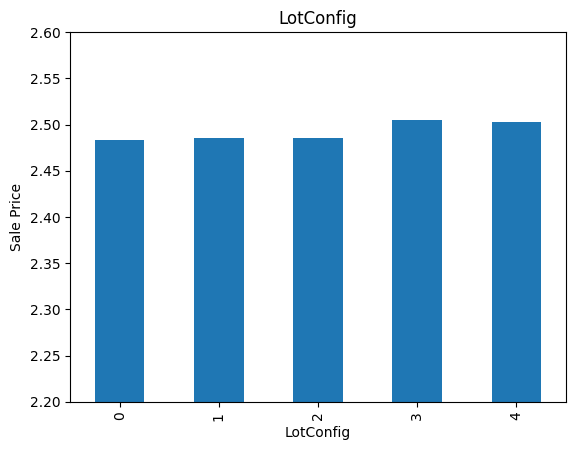

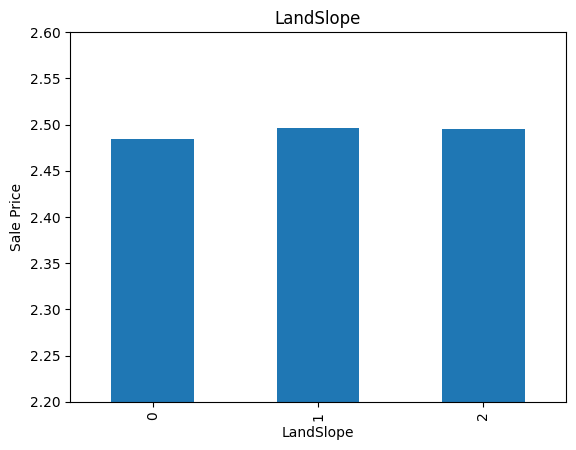

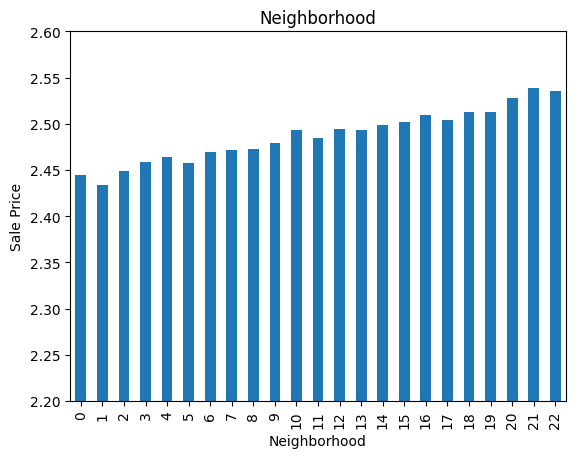

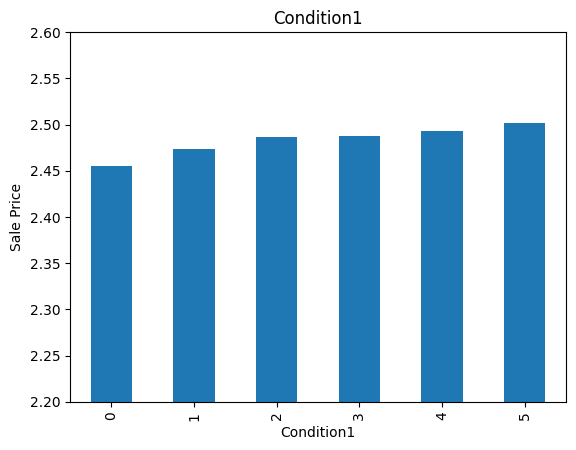

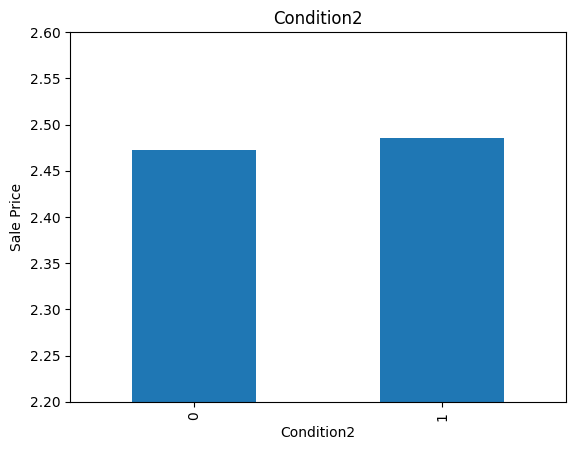

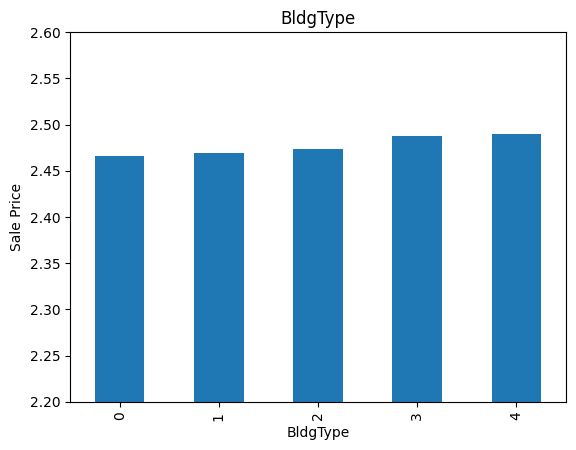

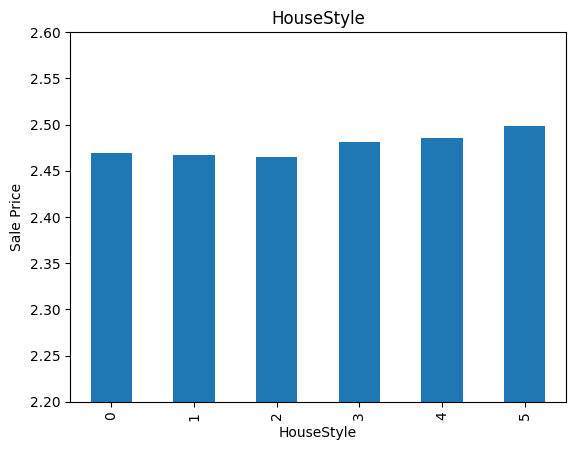

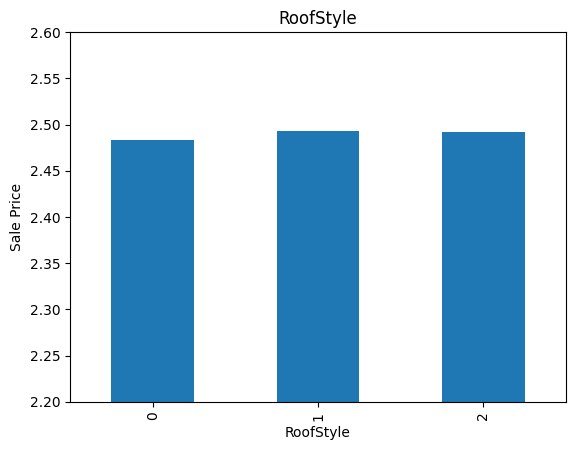

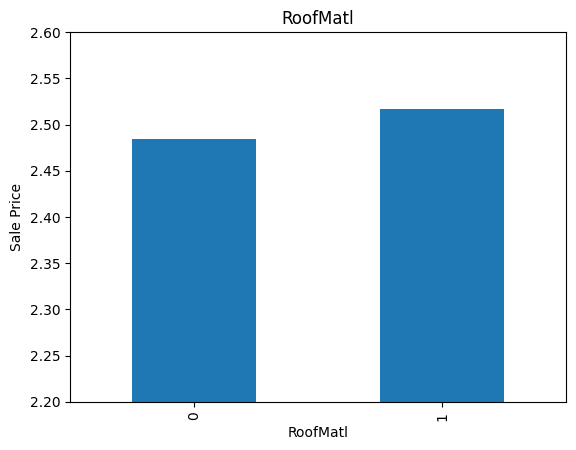

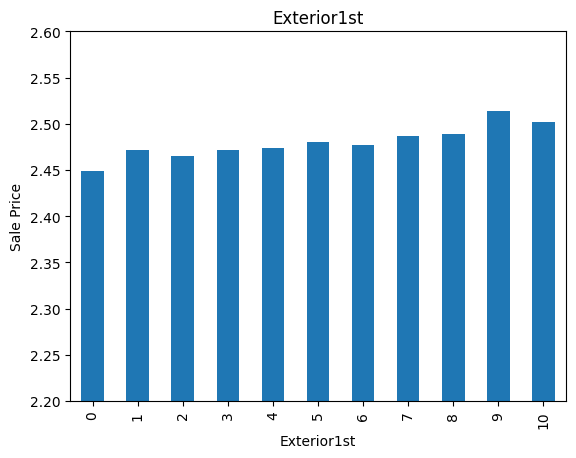

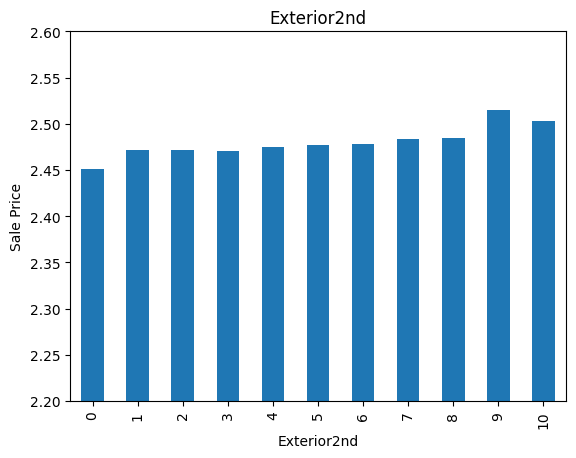

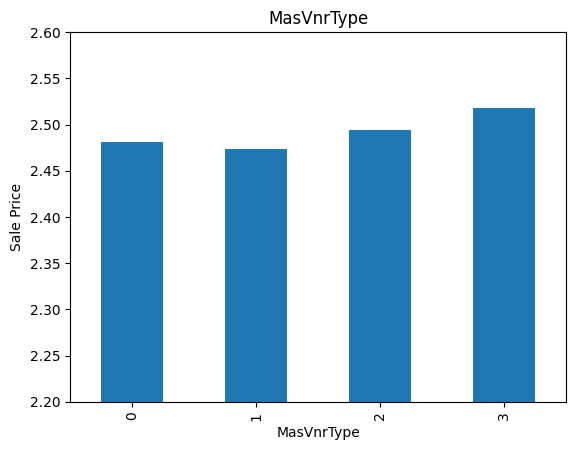

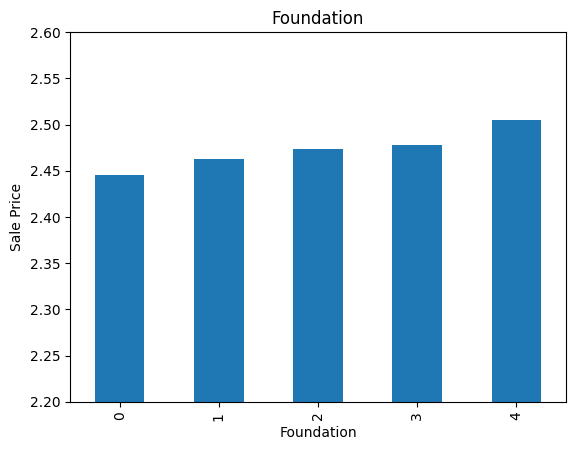

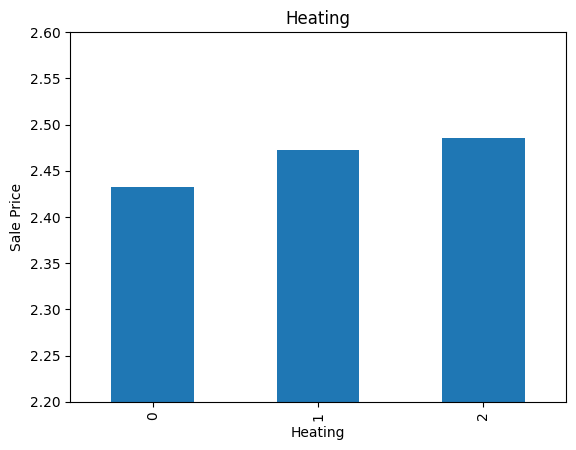

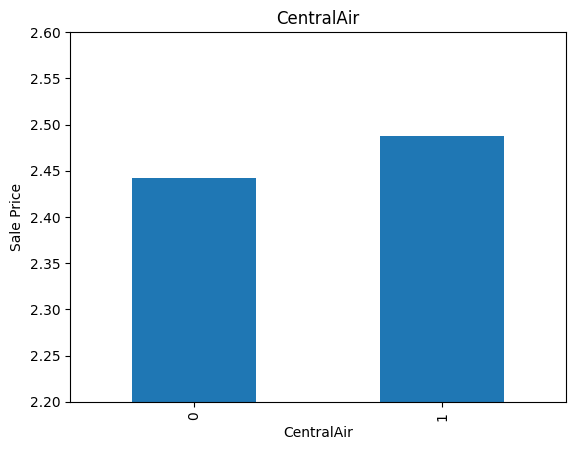

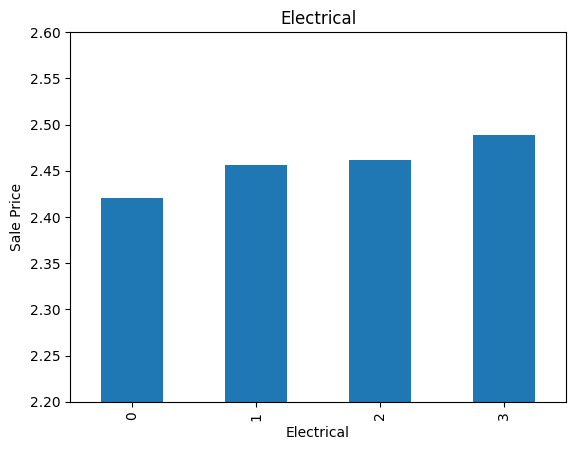

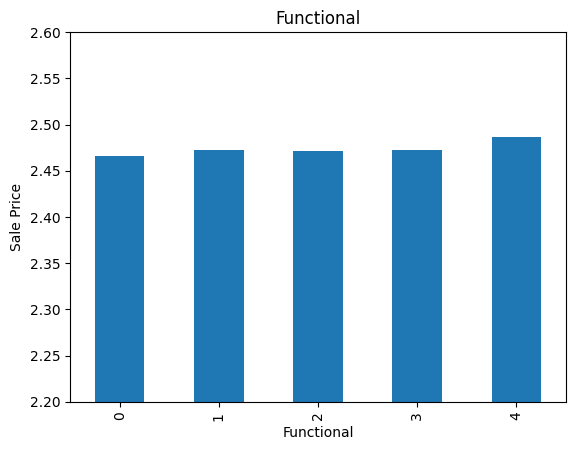

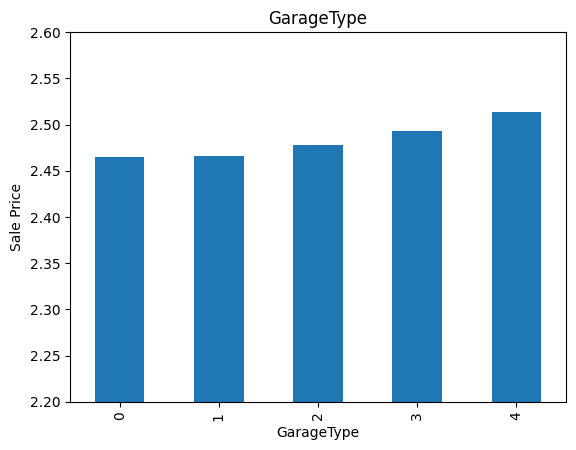

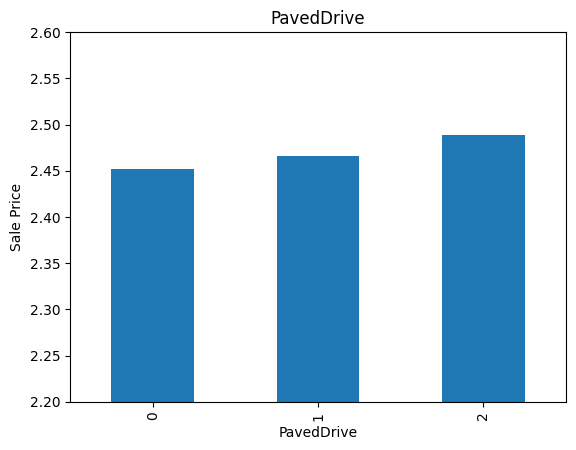

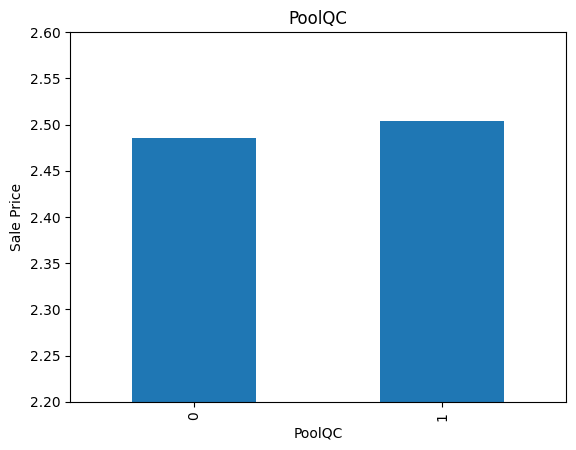

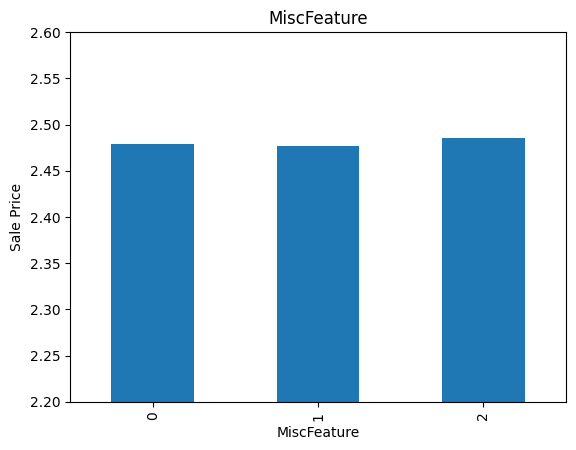

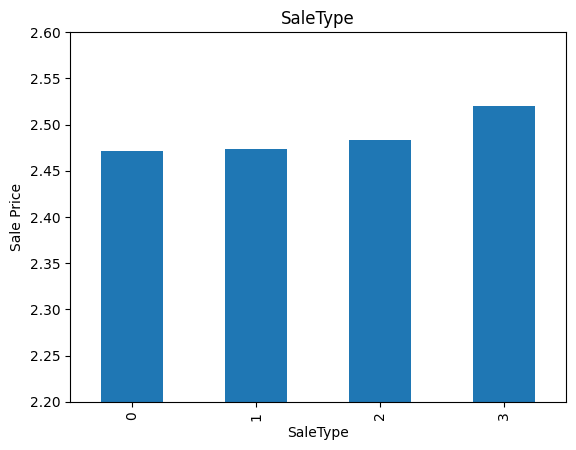

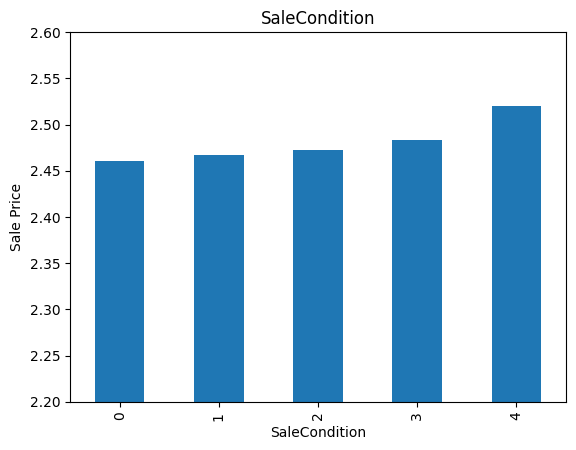

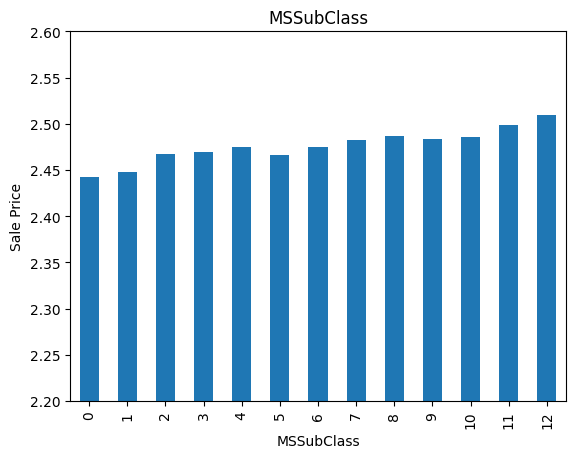

In [59]:
# monotonic relationship between labels and target

def analyse_vars(train, y_train, var):
    
    # function plots median house sale price per encoded category
    tmp = pd.concat([X_train, np.log(y_train)], axis=1)
    tmp.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylim(2.2, 2.6)
    plt.ylabel('Sale Price')
    plt.show()
    
for var in cat_others:
    analyse_vars(X_train, y_train, var)

In [60]:
## Feature Scaling

In [61]:
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train) 

# transform the train and test set

# sklearn returns numpy arrays, so we wrap the
# array with a pandas dataframe
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [62]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.461171,0.366365,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.75,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.456066,0.388528,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,0.5,0.5,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.75,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.916667,0.75,0.394699,0.336782,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
3,0.750000,0.75,0.445002,0.482280,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.084112,0.5,0.50,0.362482,0.5,0.5,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.636364,0.666667,0.75,1.0,0.0,0.0
4,0.750000,0.75,0.577658,0.391756,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,0.5,0.5,0.333333,0.666667,0.000000,0.6,0.086818,0.0,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.75,0.411215,0.5,0.50,0.406206,0.5,0.5,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


In [63]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.445002,0.620348,1.0,1.0,0.333333,0.333333,1.0,1.0,0.0,0.727273,0.4,1.0,0.75,0.6,0.555556,0.250,0.367647,0.540984,1.0,0.0,0.1,0.5,0.333333,0.064873,0.666667,0.5,1.0,0.333333,0.666667,0.0,0.4,0.215982,0.0,0.0,0.379006,0.333061,1.0,0.5,1.0,1.000000,0.764014,0.000000,0.0,0.714182,0.333333,0.0,1.000000,0.0,0.500,0.666667,0.333333,0.583333,0.0,0.666667,0.6,0.75,0.299065,0.5,0.50,0.341326,0.5,0.5,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.181818,0.666667,0.00,1.0,1.0,0.0
1,0.416667,0.75,0.490408,0.378248,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.363636,0.0,1.0,0.75,0.2,0.555556,0.750,0.477941,0.934426,0.0,0.0,0.1,0.1,0.333333,0.000000,0.333333,0.5,0.5,0.333333,0.666667,0.0,0.6,0.071403,0.4,1.0,0.110543,0.131915,1.0,0.5,1.0,0.666667,0.398758,0.331197,0.0,0.549294,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.000000,0.250000,1.0,0.666667,0.6,0.75,0.607477,0.0,0.25,0.169252,0.5,0.5,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.416667,0.75,0.445002,0.319872,1.0,1.0,0.333333,0.000000,1.0,0.5,0.0,0.181818,0.4,1.0,0.75,0.2,0.444444,0.375,0.433824,0.983607,0.0,0.0,0.3,0.2,0.000000,0.100625,0.333333,0.5,0.5,0.333333,0.666667,0.0,0.2,0.032778,0.0,0.0,0.243381,0.116039,1.0,0.5,1.0,1.000000,0.406964,0.119658,0.0,0.453307,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.6,0.25,0.551402,0.0,0.25,0.248237,0.5,0.5,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,1.0,0.0,0.0
3,1.000000,0.75,0.508690,0.388489,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.772727,0.4,1.0,0.75,1.0,0.666667,0.500,0.227941,0.524590,1.0,0.0,0.7,0.7,0.666667,0.186875,0.333333,0.5,0.5,0.666667,0.666667,0.0,0.6,0.069454,0.0,0.0,0.356712,0.189853,1.0,1.0,1.0,1.000000,0.469855,0.462607,0.0,0.636999,0.000000,0.0,0.666667,0.5,0.500,0.333333,0.333333,0.500000,1.0,0.333333,0.6,0.75,0.289720,1.0,0.50,0.356135,0.5,0.5,1.0,0.336056,0.213894,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.181818,0.666667,0.75,0.0,0.0,0.0
4,0.333333,0.25,0.000000,0.048030,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.090909,0.4,1.0,0.50,1.0,0.555556,0.500,0.286765,0.655738,0.0,0.0,0.6,0.5,0.666667,0.238125,0.333333,0.5,0.5,0.333333,0.666667,0.0,0.0,0.000000,0.0,0.0,0.243846,0.085925,1.0,0.5,1.0,1.000000,0.171149,0.302885,0.0,0.419061,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.333333,0.333333,1.0,0.000000,0.0,0.25,0.364486,0.0,0.25,0.186178,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.181818,0.666667,0.50,0.0,0.0,0.0
